In [1]:
import pandas as pd
import numpy as np
import os
from ctypes import cdll
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression


In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_json('transactions.txt',lines=True)

# Q1

In [3]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
accountNumber               786363 non-null int64
customerId                  786363 non-null int64
creditLimit                 786363 non-null int64
availableMoney              786363 non-null float64
transactionDateTime         786363 non-null object
transactionAmount           786363 non-null float64
merchantName                786363 non-null object
acqCountry                  786363 non-null object
merchantCountryCode         786363 non-null object
posEntryMode                786363 non-null object
posConditionCode            786363 non-null object
merchantCategoryCode        786363 non-null object
currentExpDate              786363 non-null object
accountOpenDate             786363 non-null object
dateOfLastAddressChange     786363 non-null object
cardCVV                     786363 non-null int64
enteredCVV                  786363 non-null int64
cardLast4Digits          

In [5]:
data.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


In [6]:
data.drop(['merchantCity','merchantState','merchantZip','posOnPremises','recurringAuthInd','echoBuffer'],axis=1, inplace=True)

In [8]:
data

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [9]:
data = data.dropna()

In [11]:
for i in range(len(data['transactionAmount'])):
    if data['transactionAmount'][i] == 0:
        data.drop(index = i, inplace=True) 
    

In [12]:
data.reset_index()

,index,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.00,False,False,False
1,1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,True,False,False
2,2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
3,3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.00,False,False,False
4,4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.00,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
764133,786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1095.04,False,False,False
764134,786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1214.96,False,False,False
764135,786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,1233.85,False,False,False
764136,786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,1283.28,False,False,False


In [13]:
TA = data['transactionAmount']

# Q2

(array([1.12579e+05, 9.08650e+04, 8.17910e+04, 6.52440e+04, 5.24630e+04,
        4.56320e+04, 3.99360e+04, 3.45560e+04, 3.03040e+04, 2.65630e+04,
        2.30390e+04, 2.00680e+04, 1.76380e+04, 1.56080e+04, 1.35400e+04,
        1.16940e+04, 1.02520e+04, 9.18400e+03, 7.90800e+03, 6.90000e+03,
        6.08100e+03, 5.34900e+03, 4.46600e+03, 4.00600e+03, 3.55400e+03,
        3.11200e+03, 2.65300e+03, 2.43900e+03, 2.08100e+03, 1.86100e+03,
        1.63000e+03, 1.42100e+03, 1.21700e+03, 1.07200e+03, 9.81000e+02,
        7.96000e+02, 6.95000e+02, 6.43000e+02, 5.69000e+02, 4.16000e+02,
        4.29000e+02, 3.34000e+02, 2.85000e+02, 2.68000e+02, 2.69000e+02,
        1.87000e+02, 1.94000e+02, 1.69000e+02, 1.53000e+02, 1.26000e+02,
        1.09000e+02, 1.15000e+02, 7.90000e+01, 7.00000e+01, 6.90000e+01,
        6.90000e+01, 4.50000e+01, 4.50000e+01, 3.70000e+01, 3.80000e+01,
        2.90000e+01, 2.70000e+01, 1.90000e+01, 2.90000e+01, 2.40000e+01,
        1.40000e+01, 1.00000e+01, 1.40000e+01, 1.10

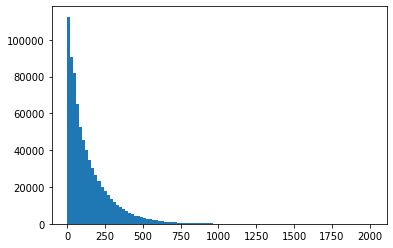

In [14]:
plt.xlabel('amount')
plt.ylabel('num')
plt.hist(TA, bins=100)

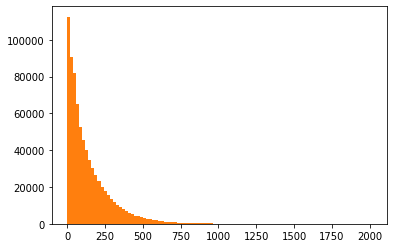

In [15]:
a = plt.hist(TA, bins=100)[0]
b = plt.hist(TA, bins=100)[1]

Take  logarithm of this histgram 

In [16]:
x = np.zeros(len(a)+1)
for i in range(len(x)-1):
    x[i+1] = a[i]

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


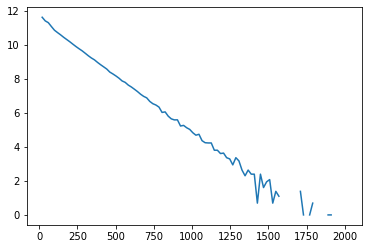

In [17]:
plt.plot(b,np.log(x))

It looks linear, so we assumed the original histgram follow a distribution like $$y = e^{ax+b}$$

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
model = LinearRegression()
model = model.fit(b[1:79].reshape(-1, 1), np.log(a[0:78]).reshape(-1, 1))


In [20]:
model.intercept_

array([11.54795387])

In [21]:
model.coef_

array([[-0.00666263]])

In [22]:
from scipy.stats import ks_2samp

In [23]:
len(np.exp(model.coef_ * b[1:79] + model.intercept_))

1

In [24]:
X = np.reshape(np.exp(model.coef_ * b[1:79] + model.intercept_),78,order = 'C')
Y = np.reshape(a[0:78],78,order = 'C') 

In [25]:
ks_2samp(X,Y)

Ks_2sampResult(statistic=0.038461538461538464, pvalue=0.9999999981206594)

Acoording to the result of the k-s test, k-s statistic is sufficient small and the p-value is quite close to 1. In that case, we could confidently believe that the original histgram follows a distribution like:
$$y = e^{-0.00666263x+11.54795387}$$

# Q3

Reversed transactions can be found if there are two transactions which had the same transaction amount and card number but had different transaciton type.



Multiple swipes can be found if there are several same transactions within one day.

We try to remove these data

In [31]:
data = data.reset_index()

In [38]:
import time, datetime

In [41]:
data['transactionDateTime'] = pd.to_datetime(data['transactionDateTime'])

In [163]:
data2 = data.sort_index(axis = 0, ascending = True, by=['transactionDateTime'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


In [164]:
data2 = data2.reset_index()

In [152]:
temp = 0
day = data2['transactionDateTime'][0].date()
RT = np.zeros(0)
for i in range(len(data2)):
    if data2['transactionType'][i] == 'REVERSAL':
        count = 0
        if data2['transactionDateTime'][i].date() == day:
            temp = temp
        else:
            for k in range(temp,i+1):
                if data2['transactionDateTime'][i].date() == data2['transactionDateTime'][k].date():
                    temp = k
                    day = data2['transactionDateTime'][k].date()
                    
                    break
                
        
        
        j = temp
        
        while data2['transactionDateTime'][j].date() == data2['transactionDateTime'][i].date():
            j = j+1
            if j>=len(data2)-1:
                break
            if data2['transactionType'][j-1] == 'PURCHASE'\
            and data2['transactionAmount'][i] == data2['transactionAmount'][j-1]:
                RT = np.append(RT,j-1)
                count = count + 1
                break        
        if count != 0:
            RT = np.append(RT,i)
            
              
                
        
        

In [171]:
RT = list(set(RT))

In [160]:
RT

array([1.64000e+02, 1.69000e+02, 3.21000e+02, ..., 7.63757e+05,
       7.63862e+05, 7.63868e+05])

In [172]:
for i in range(len(RT)):
    data2.drop(index = int(RT[i]), inplace=True) 

In [174]:
data2 = data2.drop(['level_0'], axis=1)

In [175]:
data2 = data2.reset_index()

In [176]:
data2

,level_0,index,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,0,640789,419104777,419104777,50000,50000.00,2016-01-01 00:01:02,44.09,Washington Post,US,US,09,01,subscriptions,03/2028,2015-05-30,2015-05-30,837,837,5010,PURCHASE,0.00,False,False,False
1,1,28946,674577133,674577133,5000,5000.00,2016-01-01 00:01:44,329.57,staples.com,US,US,09,08,online_retail,10/2024,2015-08-19,2015-08-19,430,430,1693,PURCHASE,0.00,False,False,False
2,2,222211,958438658,958438658,20000,20000.00,2016-01-01 00:01:47,164.57,cheapfast.com,US,US,05,01,online_retail,04/2023,2013-07-20,2013-07-20,445,445,2062,PURCHASE,0.00,False,False,False
3,3,470320,851126461,851126461,10000,10000.00,2016-01-01 00:02:04,122.83,discount.com,US,US,02,08,online_retail,07/2025,2014-10-18,2014-10-18,667,667,7359,PURCHASE,0.00,False,False,False
4,4,727644,974901832,974901832,250,250.00,2016-01-01 00:03:47,24.56,staples.com,US,US,05,01,online_retail,05/2032,2012-05-29,2012-05-29,290,290,9744,PURCHASE,0.00,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751050,764133,472383,690351684,690351684,7500,6007.68,2016-12-30 23:57:33,128.84,EZ Putt Putt #551896,US,US,09,01,entertainment,12/2032,2015-02-26,2015-02-26,380,380,6106,PURCHASE,1492.32,True,False,False
751051,764134,769872,365766122,365766122,7500,970.87,2016-12-30 23:58:25,49.47,alibaba.com,US,US,90,01,online_retail,07/2030,2015-01-19,2016-10-06,479,479,1194,PURCHASE,6529.13,False,False,False
751052,764135,624229,543902721,543902721,1000,767.70,2016-12-30 23:59:33,13.02,abc.com,US,US,05,08,online_subscriptions,02/2023,2012-02-11,2012-02-11,743,743,4157,PURCHASE,232.30,False,False,False
751053,764136,280484,912493707,912493707,5000,4991.10,2016-12-30 23:59:35,8.85,Play Store,US,US,09,08,mobileapps,03/2028,2012-09-28,2016-10-31,284,284,9972,PURCHASE,8.90,False,False,False


In [1]:
print('share of reversed transactions=',(764138-751055)/764138)

share of reversed transactions= 0.01712125296739594


In [177]:
MS = np.zeros(0)
for i in range(0,len(data2)):
    j = i+1
    while data2['transactionAmount'][i] == data2['transactionAmount'][j] \
    and data2['cardCVV'][i] == data2['cardCVV'][j]:
        MS = np.append(ans,j)
        j = j+1
        
    if j>=len(data2)-1:
        break
    

In [181]:
for i in range(len(MS)):
    data2.drop(index = int(RT[i]), inplace=True) 
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


KeyError: '[753903] not found in axis'

In [183]:
data2 = data2.drop(['level_0'], axis=1)


In [184]:
data2 = data2.reset_index()

# Q4

First, we should determine the ratio between the transactions which are fraud and those which are not fraud

In [193]:
C_T = 0
C_F = 0
for i in range(len(data2)):
    if data2['isFraud'][i] == False:
        C_F = C_F + 1
    else:
        C_T = C_T + 1

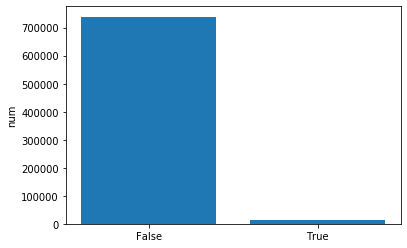

In [202]:
values = [C_F, C_T]
name_list = ['False','True']
plt.ylabel('num')
plt.bar(range(len(values)),values,tick_label=name_list)
plt.show()

It is shown that transactions that are not fraud are significant larger than those which are fraud. In that case we shoud down sampling the data

In [224]:
Y = data2['isFraud']
X = data2[['creditLimit','availableMoney','transactionAmount','posEntryMode','posConditionCode','merchantCategoryCode','currentBalance','transactionType']]

In [17]:
Y = pd.read_csv('Y.csv',header = None)
X = pd.read_csv('X.csv')

In [3]:
from imblearn.under_sampling import RandomUnderSampler

In [28]:
X2, Y2 = RandomUnderSampler().fit_resample(X,Y)

In [31]:
from sklearn.model_selection import train_test_split

In [99]:
x_train, x_test, y_train, y_test = train_test_split(X2, Y2)

In [100]:
x_train = x_train.reset_index()
x_train.drop(['index'],axis=1,inplace=True)
x_test =  x_test.reset_index()
x_test.drop(['index'],axis=1,inplace=True)
y_train =  y_train.reset_index()
y_train.drop(['index'],axis=1,inplace=True)
y_test = y_test.reset_index()
y_test.drop(['index'],axis=1,inplace=True)


In [101]:
def pre(X):
    X = X.drop(columns = ['merchantCategoryCode'])
    T = np.zeros(len(X))
    for i in range(0,5):
        X['PEM'+str(i)] = T
    for i in range(0,3):
        X['PCC'+str(i)] = T
    for i in range(0,2):
        X['TT'+str(i)] = T
        
    for i in range(len(X)):
        if X['posEntryMode'][i] == 9:
            X['PEM0'][i] = 1
        if X['posEntryMode'][i] == 5:
            X['PEM1'][i] = 1
        if X['posEntryMode'][i] == 2:
            X['PEM2'][i] = 1
        if X['posEntryMode'][i] == 90:
            X['PEM3'][i] = 1
        if X['posEntryMode'][i] == 80:
            X['PEM4'][i] = 1
            
    for i in range(len(X)):
        if X['posConditionCode'][i] == 1:
            X['PCC0'][i] == 1
        if X['posConditionCode'][i] == 8:
            X['PCC1'][i] == 1
        if X['posConditionCode'][i] == 99:
            X['PCC2'][i] == 1
            
    for i in range(len(X)):
        if X['transactionType'][i] == 'PURCHASE':
            X['TT0'][i] = 1
    for i in range(len(X)):
        if X['transactionType'][i] == 'REVERSAL':
            X['TT1'][i] = 1
        
    X = X.drop(columns = ['posEntryMode','posConditionCode','transactionType'])   
    return X    
    

In [102]:
x_train2 = pre(x_train)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning:

In [122]:
x_test2 = pre(x_test)

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning:

In [196]:
def huatu(X,Y):
    TT = 0 
    TF = 0 
    FF = 0 
    FT = 0
    for i in range(len(X)):
        if X[i] == Y[i]:
            if X[i] == False:
                FF = FF + 1
            if X[i] == True:
                TT = TT + 1
        if X[i] != Y[i]:
            if X[i] == False:
                FT = FT + 1
            if X[i] == True:
                TF = TF + 1

        values = [TT, FF, TF, FT]
    name_list = ['true when true','false when false','false when true', 'true when false']
    plt.ylabel('num')
    plt.bar(range(len(values)),values,tick_label=name_list)
    plt.show()


then applied several model to predict fraud transaction and rank them by roc curve

# Logistic Regression

In [197]:
from sklearn.linear_model import LogisticRegression

In [204]:
LR = LogisticRegression(random_state=0).fit(x_train2, y_train)
print('accuracy(train)=',LR.score(x_train2, y_train))

accuracy(train)= 0.5827949864723097


D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [205]:
X = LR.predict(x_train2)

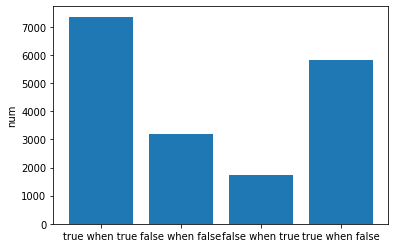

In [207]:
# result in train set
huatu(y_train[1],X)

In [208]:
print('accuracy(test)=',LR.score(x_test2, y_test))

accuracy(test)= 0.579592512837502


In [209]:
X = LR.predict(x_test2)

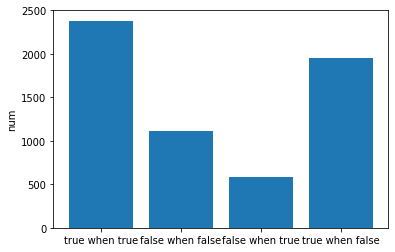

In [210]:
#result in test set
huatu(y_test[1],X)

It is shown that logistic regression tend to predict the data to be true

# XGBoosting

In [211]:
from xgboost import XGBClassifier
    

In [212]:
XGB = XGBClassifier().fit(x_train2,y_train)  
print('accuracy(train)=',XGB.score(x_train2, y_train))

D:\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy(train)= 0.7597592623267627


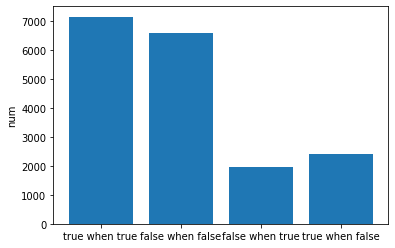

In [216]:
# result in train set
X = XGB.predict(x_train2)
huatu(y_train[1],X)

In [215]:
print('accuracy(test)=',XGB.score(x_test2, y_test))

accuracy(test)= 0.6435315554083154


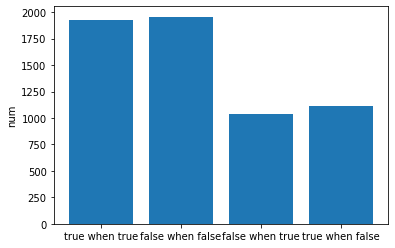

In [217]:
#result in test set
X = XGB.predict(x_test2)
huatu(y_test[1],X)

# Random Forest

We add two hyper prameter to the model -- max_depth and random_state. 

In [131]:
from sklearn.ensemble import RandomForestClassifier

In [139]:
accuracy = np.zeros((10,10))
for i in range(0,10):
    for j in range(0,10):
        RFC = RandomForestClassifier(max_depth=i+1, random_state=j)
        RFC.fit(x_train2, y_train)
        accuracy[i,j] = RFC.score(x_train2, y_train)+RFC.score(x_test2, y_test)
        

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expe

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expe

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """
D:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expe

In [141]:
np.argmax(accuracy)

93

it is shown that the model perform the best when max_depth=10 and random_state=4

In [237]:
RFC = RandomForestClassifier(max_depth=10, random_state=4)
RFC.fit(x_train2, y_train)
print('accuracy(train)=',RFC.score(x_train2, y_train))

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


accuracy(train)= 0.7008447904588372


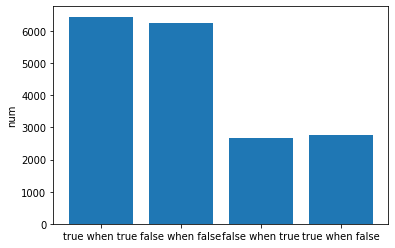

[0.7077750933450472, 0.3061632426429761]

In [238]:
# result in train set
X = RFC.predict(x_train2)
huatu(y_train[1],X)

In [239]:
print('accuracy(test)=',RFC.score(x_test2, y_test))

accuracy(test)= 0.6599304290210369


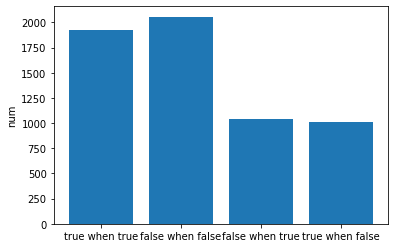

[0.6495956873315364, 0.3300749429781688]

In [240]:
#result in test set
X = RFC.predict(x_test2)
huatu(y_test[1],X)

In [241]:
from sklearn import metrics

def plot_roc(actuals, predicted_dict):
    plt.title('ROC')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    for key, predicted in predicted_dict.items():
        fpr, tpr, threshold = metrics.roc_curve(actuals, predicted)
        roc_auc = metrics.auc(fpr, tpr)
        plt.plot(fpr, tpr, label = '%25s AUC = %0.2f' % (key, roc_auc))
    plt.legend(loc = 'lower right')
    plt.show()

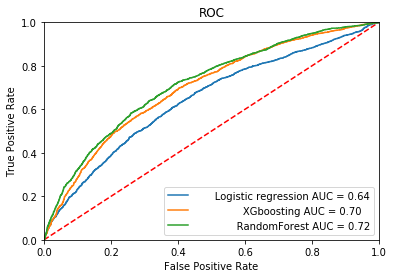

In [242]:
LR_pred = LR.predict_proba(x_test2)[:,1]
XGB_pred = XGB.predict_proba(x_test2)[:,1]
RFC_preb = RFC.predict_proba(x_test2)[:,1]
plot_roc(y_test, {"Logistic regression": LR_pred, 'XGboosting':XGB_pred,'RandomForest': RFC_preb})

according to the ROC curve we could conclude that the RandomForest perform the best and the Logistic regression perform the worst